In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
import numpy as np
from pycaret.regression import *
import keras
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras import layers
import matplotlib.pyplot as plt
from keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [47]:
with open("asset/data/100/X1.pickle", "rb") as handle:
    X = pickle.load(handle)
with open("asset/data/100/y1.pickle", "rb") as handle:
    y = pickle.load(handle)
with open("asset/data/100/X.pickle", "rb") as handle:
    Xa = pickle.load(handle)
with open("asset/data/100/y.pickle", "rb") as handle:
    ya = pickle.load(handle)

(array([ 100100.,       0.,       0.,       0.,       0., 1069830.,
          18817.,  205066.,  489974.,  274473.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

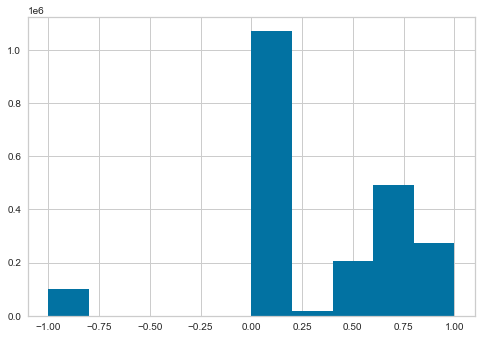

In [63]:
plt.hist(y)

In [88]:
lr = .0003
epochs = 200
model_name = "DNN_Regressor"
es_callback = EarlyStopping(monitor='val_loss', min_delta=.0001, patience=5, verbose=0, mode='auto')
checkpoint_callback = ModelCheckpoint(f"asset/models/{model_name}.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

def build_and_compile_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu'),
        layers.Dropout(.1),
        BatchNormalization(),

        layers.Dense(16, activation='relu'),
        layers.Dropout(.1),
        BatchNormalization(),

        layers.Dense(8, activation='relu'),
        BatchNormalization(),

        layers.Dense(1)
        ])

    model.compile(loss='mean_absolute_error', metrics=[r2], optimizer=Adam(lr))
    return model

In [89]:
m = build_and_compile_model()

In [66]:
m.build(input_shape=[None, 12])
# m.save("asset/models/base_model.h5")

In [90]:
hist = m.fit(X, y, validation_split=.15, epochs=epochs, callbacks=[checkpoint_callback, es_callback])

Epoch 1/200
57329/57329 [==============================] - 81s 1ms/step - loss: 0.2376 - r2: 0.2505 - val_loss: 0.1085 - val_r2: 0.0292

Epoch 00001: val_loss improved from inf to 0.10851, saving model to asset/models\DNN_Regressor.h5
Epoch 2/200
57329/57329 [==============================] - 79s 1ms/step - loss: 0.1208 - r2: 0.6652 - val_loss: 0.0964 - val_r2: 0.3028

Epoch 00002: val_loss improved from 0.10851 to 0.09644, saving model to asset/models\DNN_Regressor.h5
Epoch 3/200
57329/57329 [==============================] - 81s 1ms/step - loss: 0.1003 - r2: 0.7731 - val_loss: 0.0863 - val_r2: 0.7697

Epoch 00003: val_loss improved from 0.09644 to 0.08626, saving model to asset/models\DNN_Regressor.h5
Epoch 4/200
57329/57329 [==============================] - 81s 1ms/step - loss: 0.0870 - r2: 0.8354 - val_loss: 0.0971 - val_r2: 0.8477

Epoch 00004: val_loss did not improve from 0.08626
Epoch 5/200
57329/57329 [==============================] - 83s 1ms/step - loss: 0.0825 - r2: 0.8519

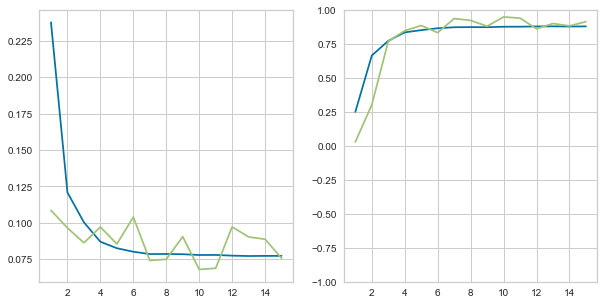

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes = axes.ravel()
axes[1].set_ylim(-1, 1)
axes[0].plot(range(1, len(hist.history["loss"])+1), hist.history["loss"], label="loss")
axes[0].plot(range(1, len(hist.history["loss"])+1), hist.history["val_loss"], label="val_loss")
axes[1].plot(range(1, len(hist.history["loss"])+1), hist.history["r2"], label="r2")
axes[1].plot(range(1, len(hist.history["loss"])+1), hist.history["val_r2"], label="val_r2")

In [15]:
y

array([ 0.,  0.,  0., ...,  0.,  0., -1.])

In [20]:
m.predict(X[1113974].reshape(1, -1))

array([[0.65233237]], dtype=float32)

In [109]:
a = keras.models.load_model("asset/models/DNN_Regressor.h5", custom_objects={"r2": r2})
